# Solutions to exercises

## Setup

The following instantiates a package environment.

In [1]:
using Pkg
Pkg.activate(joinpath(@__DIR__, "..", ".."))
Pkg.instantiate()

  Activating project at `~/GoogleDrive/Julia/HelloJulia`


## Exercise 1

Write a function named `total` that adds the elements of its vector input.

### Solution

In [2]:
function total(v)
    sum = 0.0 # better is zero(v)
    for i in 1:length(v)
        sum = sum + v[i]
    end
    return sum
end

total (generic function with 1 method)

In [3]:
total(1:10)

55.0

The built-in function is called `sum`.

## Exercise 2

Generate a 1000 random samples from the standard normal
distribution. Create a second such sample, and add the two samples
point-wise.  Compute the (sample) mean and variance of the combined
samples. In the same plot, show a frequency-normalized histogram of
the combined samples and a plot of the pdf for normal distribution
with zero mean and variance `2`.

### Solution

In [4]:
using Distributions, Statistics

samples1 = randn(1000); # or rand(Normal(), 1000)
samples2 = randn(1000);

samples = samples1 .+ samples2;

mu = mean(samples)
var = std(samples)^2

@show mu var

mu = 0.048715761896321735
var = 1.866091260639755


1.866091260639755

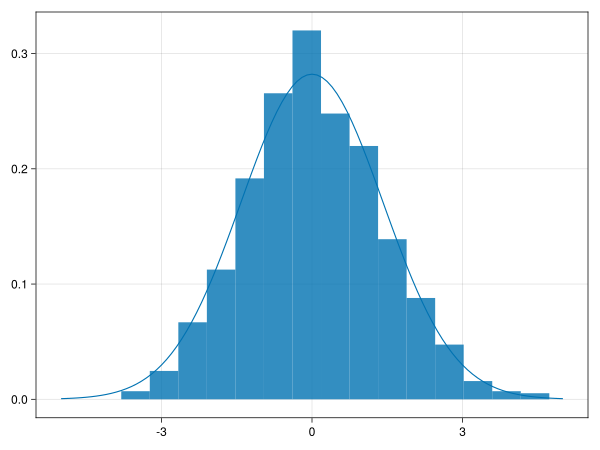

In [5]:
d = Normal(0, sqrt(2))
f(x) = pdf(d, x)

xs = -5:(0.1):5
ys = f.(xs);

using CairoMakie
CairoMakie.activate!(type = "svg")

fig = hist(samples, normalization=:pdf)
lines!(xs, ys)
current_figure()

## Exercise 3

The following shows that named tuples share some behaviour with dictionaries:

In [6]:
t = (x = 1, y = "cat", z = 4.5)
keys(t)

(:x, :y, :z)

In [7]:
t[:y]

"cat"

Write a function called `dict` that converts a named tuple to an
actual dictionary. You can create an empty dictionary using `Dict()`.

### Solution

In [8]:
function dict(t)
    d = Dict()
    for k in keys(t)
        d[k] = t[k]
    end
    return d
end

dict (generic function with 1 method)

In [9]:
dict(t)

Dict{Any, Any} with 3 entries:
  :y => "cat"
  :z => 4.5
  :x => 1

A slicker way to do the same thing is:

In [10]:
dict2(t) = Dict(k => t[k] for k in keys(t))

dict2 (generic function with 1 method)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*